In [4]:
import pandas as pd
data = pd.read_csv("/var/home/rafo/vscode02/Dataset/World_country_trade.csv")
df = data.copy()
df = df.iloc[:,3:]
df

,Value imported in 2022 (USD thousand),Trade balance in 2022 (USD thousand),Annual growth in value between 2018-2022 (%),Annual growth in value between 2021-2022 (%),Share in world imports (%),Average distance of supplying countries (km),Concentration of supplying countries,Average tariff (estimated) applied by the country (%)
0,4689232,-3115279,-7.0,10.0,0.0,2277.0,0.14,8.1
1,8407345,-4101110,10.0,9.0,0.0,1557.0,0.09,2.2
2,33766897,32969278,-6.0,5.0,0.1,5034.0,0.08,14.4
3,1864441,-1478298,3.0,19.0,0.0,1028.0,0.45,NaN
4,17710712,33557888,-1.0,56.0,0.1,8524.0,0.07,8.4
...,...,...,...,...,...,...,...,...
192,28264000,-12977072,11.0,19.0,0.1,3475.0,0.12,12.4
193,424720,-202207,7.0,25.0,0.0,6989.0,0.12,7.4
194,8985465,-7274046,8.0,8.0,0.0,6354.0,0.14,6.9
195,9048377,2641355,-1.0,27.0,0.0,4526.0,0.17,10.9


In [6]:
df.dropna(inplace= True)

In [18]:
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.cross_decomposition import  PLSRegression,PLSSVD

In [19]:
y = df["Value imported in 2022 (USD thousand)"]
x = df.drop("Value imported in 2022 (USD thousand)",axis= 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 42,test_size= 0.25)

Model

In [20]:
pls_model = PLSRegression().fit(x_train,y_train)

In [21]:
pls_model.coef_

array([[ 2.59758444e+07,  7.83116782e+06,  2.86118318e+05,
         2.89002100e+08, -6.20275670e+06,  7.37755402e+06,
         1.36376595e+07]])

Təxmin

In [22]:
y_predict = pls_model.predict(x_train)

Train xətası

In [23]:
import numpy as np
np.sqrt(mean_squared_error(y_train,y_predict))

30885035.823956426

R scorun hesablanması

In [24]:
r2_score(y_train,y_predict)

0.9893326988720154

Test xətası

In [25]:
x_test_predict = pls_model.predict(x_test)

In [27]:
np.sqrt(mean_squared_error(y_test,x_test_predict))

21874702.205949984

In [30]:
from sklearn import  model_selection
pls = PLSRegression(n_components= 1)
cv = model_selection.KFold(shuffle = True,random_state = 1)
RMSE = []
for i in np.arange(1,x_train.shape[1]+1):
    score = np.sqrt(-1 *model_selection.cross_val_score(pls,x_train,y_train,cv = cv,scoring= "neg_mean_squared_error").mean())
    RMSE.append(score)

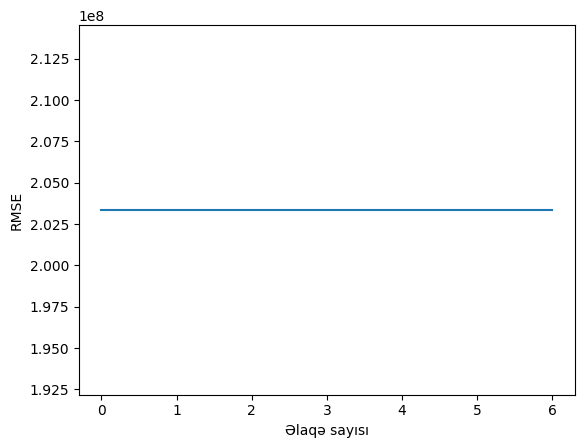

In [32]:
import matplotlib.pyplot as plt
plt.plot(RMSE)
plt.xlabel("Əlaqə sayısı")
plt.ylabel("RMSE")
plt.show()

Final model (dəyişiklik olmuyacaq datanı düzgün seçməmişəm)

In [34]:
pls_model_final = PLSRegression(n_components= 4).fit(x_train,y_train)

In [36]:
y_predict_final = pls_model_final.predict(x_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_predict_final))

6390441.882563245